# Projet App Stat (étude basique de la database)

In [4]:
import numpy as np
np.logspace(-9, 3, 6)

array([1.00000000e-09, 2.51188643e-07, 6.30957344e-05, 1.58489319e-02,
       3.98107171e+00, 1.00000000e+03])

In [5]:
np.logspace(-2, 10, 6)

array([1.00000000e-02, 2.51188643e+00, 6.30957344e+02, 1.58489319e+05,
       3.98107171e+07, 1.00000000e+10])

In [6]:
np.arange (0, 10, 1)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [76]:
import pandas as pd

# options d'affichage
pd.set_option("display.min_rows", 20)
pd.set_option("display.max_column", 200)

In [77]:
df = pd.read_csv("./MobilePriceDescription/train.csv")
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,15,1137,1224,513,19,10,12,1,0,0,0


# 1/ Pre-processing ( traitement de base de la donnée)

In [3]:
df.loc[df.isna().any(axis=1)]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [4]:
df.duplicated().value_counts()

False    2000
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
def unique_count(df,range_):
    for i in range_:
        if df.columns[i] == 'price_range':
            print(df.columns[i], " : ", len(df[df.columns[i]].unique()), " ", df[df.columns[i]].unique())
        else :
            print(df.columns[i], " : ", len(df[df.columns[i]].unique()))

In [7]:
unique_count(df, range(0,len(df.axes[1])))

battery_power  :  1094
blue  :  2
clock_speed  :  26
dual_sim  :  2
fc  :  20
four_g  :  2
int_memory  :  63
m_dep  :  10
mobile_wt  :  121
n_cores  :  8
pc  :  21
px_height  :  1137
px_width  :  1109
ram  :  1562
sc_h  :  15
sc_w  :  19
talk_time  :  19
three_g  :  2
touch_screen  :  2
wifi  :  2
price_range  :  4   [1 2 3 0]


In [8]:
def dual_value(df,range_):
    for i in range_:
        if len(df[df.columns[i]].unique()) < 3:
            print(df.columns[i], " : ", df[df.columns[i]].unique())

In [9]:
dual_value(df, range(0,len(df.axes[1])))

blue  :  [0 1]
dual_sim  :  [0 1]
four_g  :  [0 1]
three_g  :  [0 1]
touch_screen  :  [0 1]
wifi  :  [1 0]


In [78]:
def no_dual_value(df,range_):
    list_ = []
    for i in range_:
        if len(df[df.columns[i]].unique()) > 2 and df.columns[i] != 'price_range':
            list_.append(df.columns[i])
    return list_

In [79]:
list_columns_encoding = no_dual_value(df, range(0,len(df.axes[1])))
list_columns_encoding

['battery_power',
 'clock_speed',
 'fc',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time']

# 2/ Encoding

In [51]:
from sklearn.preprocessing import RobustScaler, PowerTransformer, StandardScaler

In [52]:
scaler = StandardScaler()

In [53]:
Quant_enc = pd.DataFrame(scaler.fit_transform(df[list_columns_encoding]), columns=[list_columns_encoding])

In [54]:
#replace old columns by new columns :
df[list_columns_encoding] = Quant_enc[list_columns_encoding]
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,-0.902597,0,0.830779,0,-0.762495,0,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,0,0,1,1
1,-0.495139,1,-1.253064,1,-0.992890,1,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,1,1,0,2
2,-1.537686,1,-1.253064,1,-0.532099,1,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,1,1,0,2
3,-1.419319,1,1.198517,0,-0.992890,0,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,1,0,0,2
4,1.325906,1,-0.395011,0,2.002254,1,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,1,1,0,1
5,1.412405,0,-1.253064,1,-0.301703,0,-0.553795,0.687548,0.671107,-1.539175,-0.481048,0.808917,0.931480,-0.974874,1.114266,-1.094526,-0.185077,1,0,0,1
6,1.325906,0,0.217884,0,-0.071307,1,-1.215274,1.034357,-0.035292,1.521249,0.013773,-0.595280,-0.540431,1.010444,0.164641,0.512708,1.279430,1,0,1,3
7,1.628654,0,-1.253064,1,-0.992890,0,-0.443549,1.034357,1.320993,-0.227564,-1.635631,-0.300016,-0.237254,-1.313291,0.876859,-0.635317,-1.100394,1,1,1,0
8,0.470015,1,-1.253064,0,-0.992890,0,1.155024,0.687548,0.953666,1.084046,0.673534,-0.584011,-0.961638,-0.945367,1.114266,-1.094526,1.645557,1,0,0,0
9,-1.660607,1,-1.130485,1,-0.532099,1,-1.270397,-1.393304,-1.335064,0.209639,0.838474,1.108689,-0.063680,-1.485727,1.589078,0.971917,0.181050,1,0,0,0


# 3/ Variable selection

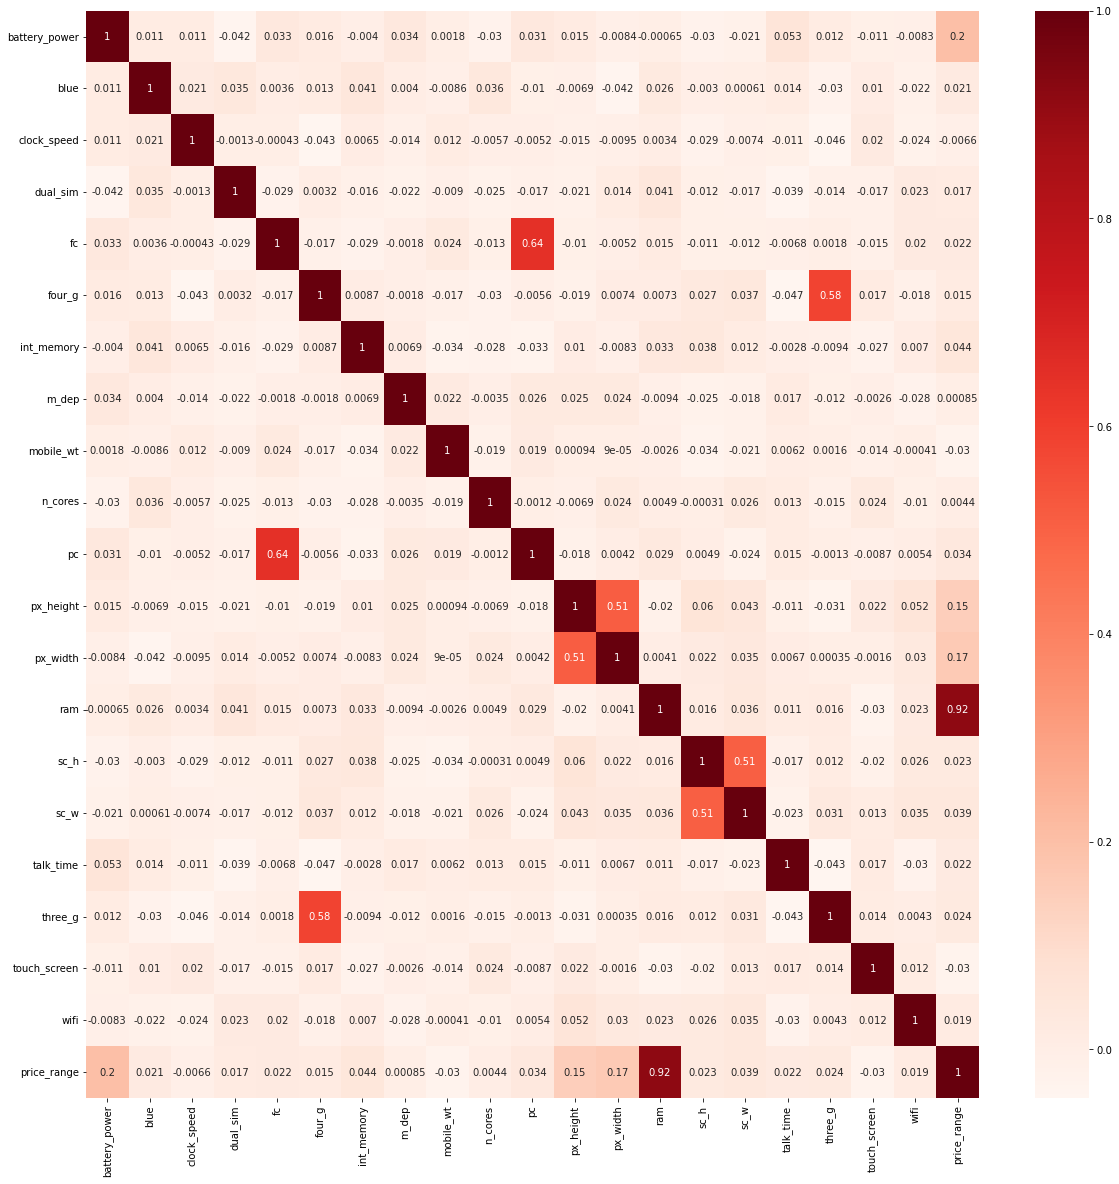

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,20))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [43]:
#drop : fc, four_g
df = df.drop(['fc', 'four_g'], axis=1)
df

,battery_power,blue,clock_speed,dual_sim,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,9,0.1,93,5,15,1137,1224,513,19,10,12,1,0,0,0


# 4/ Modelisation

### Linear Regression

In [80]:
from sklearn.model_selection import train_test_split, cross_val_score

x = df.drop(['price_range'], axis=1)
y = df['price_range']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

In [81]:
type(x_test)

pandas.core.frame.DataFrame

In [57]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

lr = linear_model.LinearRegression()

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
lr.fit(x_train,y_train)

# MSE
y_pred = lr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)

print(lr.score(x_test, y_test))

0.09881043836960567
0.9205767716665817


In [59]:
lr_coef = pd.DataFrame(lr.coef_)
x_df = pd.DataFrame(x.columns)

estimator_lr = pd.merge(x_df,lr_coef, how="right", left_index=True, right_index=True)
estimator_lr

,0_x,0_y
0,battery_power,0.229881
1,blue,-0.000183
2,clock_speed,-0.013398
3,dual_sim,-0.014872
4,fc,0.006571
5,four_g,-0.020952
6,int_memory,0.016255
7,m_dep,-0.003185
8,mobile_wt,-0.030725
9,n_cores,0.007319


### Classification 

In [72]:
#Random forest :
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy')
classifier.fit(x_train, y_train)
classifier.score(x_test, y_test)

0.915

In [82]:
#XGBoost :
from xgboost import XGBClassifier
XGBoost_model = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3)
XGBoost_model.fit(x_train, y_train)
XGBoost_model.score(x_test, y_test) 

0.9275

In [83]:
y_pred = XGBoost_model.predict(x_test)

from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        94
           1       0.91      0.91      0.91       105
           2       0.88      0.88      0.88        96
           3       0.96      0.94      0.95       105

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



In [84]:
#feature selection

X_trains_df=pd.DataFrame(x_train,columns=x_train.columns)
from sklearn.feature_selection import RFE
svc_lin=XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3)
svm_rfe_model=RFE(estimator=svc_lin)
svm_rfe_model_fit=svm_rfe_model.fit(X_trains_df,y_train)
feat_index = pd.Series(data = svm_rfe_model_fit.ranking_, index = x_train.columns)
signi_feat_rfe = feat_index[feat_index==1].index
print('Significant features from RFE',signi_feat_rfe)

Significant features from RFE Index(['battery_power', 'blue', 'fc', 'm_dep', 'mobile_wt', 'px_height',
       'px_width', 'ram', 'sc_w', 'talk_time'],
      dtype='object')


In [85]:
best_feature = list(signi_feat_rfe)
display(type(best_feature))
best_feature

list

['battery_power',
 'blue',
 'fc',
 'm_dep',
 'mobile_wt',
 'px_height',
 'px_width',
 'ram',
 'sc_w',
 'talk_time']

In [90]:
X_trains_new=x_train[best_feature]
X_tests_new=x_test[best_feature]

XGBoost_model_rfe = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3)
XGBoost_model_rfe.fit(X_trains_new, y_train)
XGBoost_model_rfe.score(X_tests_new, y_test) 

0.9275

In [92]:
y_pred = XGBoost_model_rfe.predict(X_tests_new)

from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        94
           1       0.92      0.90      0.91       105
           2       0.88      0.90      0.89        96
           3       0.96      0.94      0.95       105

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



# 5/ Prediction (A finir)

In [26]:
df_test = pd.read_csv("./MobilePriceDescription/test.csv").drop(['id'], axis=1)
df_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
5,1464,1,2.9,1,5,1,50,0.8,198,8,9,569,939,3506,10,7,3,1,1,1
6,1718,0,2.4,0,1,0,47,1.0,156,2,3,1283,1374,3873,14,2,10,0,0,0
7,833,0,2.4,1,0,0,62,0.8,111,1,2,1312,1880,1495,7,2,18,0,1,1
8,1111,1,2.9,1,9,1,25,0.6,101,5,19,556,876,3485,11,9,10,1,1,0
9,1520,0,0.5,0,1,0,25,0.5,171,3,20,52,1009,651,6,0,5,1,0,1


In [195]:
#Encoding :
Quant_enc = pd.DataFrame(scaler.fit_transform(df_test[list_columns_encoding]), columns=[list_columns_encoding])

df_test[list_columns_encoding] = Quant_enc[list_columns_encoding]
df_test = df_test.drop(['fc', 'four_g'], axis=1)
df_test

,battery_power,blue,clock_speed,dual_sim,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.475451,1,0.312601,1,-1.581269,-1.487247,1.535535,-0.580671,0.976026,-0.926990,0.391912,1.229373,0.001158,0.397363,-1.653355,0,1,0
1,-0.942782,1,-1.255832,1,1.509303,1.006341,1.478120,0.293833,0.319433,0.274729,-0.871028,1.614643,-1.388231,-1.254383,-0.743418,1,0,0
2,1.292077,1,1.519087,0,-0.367116,1.362567,1.334582,-0.580671,-0.993754,1.485693,0.287236,0.236313,1.158982,1.105254,-0.197456,0,1,1
3,0.688249,0,-1.255832,1,-0.477493,-0.062340,-1.249091,1.605590,1.632619,-0.767532,1.165604,1.612804,-0.461972,-1.254383,-0.743418,1,1,0
4,0.429135,0,-0.169994,0,0.847037,-0.062340,-0.904602,0.731085,1.304323,0.281662,-0.977979,-0.336535,0.695852,0.633326,-0.743418,1,0,1
5,0.498540,1,1.639736,1,0.902226,1.006341,1.679072,1.605590,-0.173012,-0.134318,-0.684431,1.256958,-0.461972,0.397363,-1.471368,1,1,1
6,1.086174,0,1.036493,0,0.736660,1.718794,0.473358,-1.017923,-1.157902,1.515736,0.305440,1.594414,0.464287,-0.782455,-0.197456,0,0,0
7,-0.961290,0,1.036493,1,1.564491,1.006341,-0.818479,-1.455175,-1.322051,1.582755,1.456877,-0.592156,-1.156666,-0.782455,1.258443,0,1,1
8,-0.318132,1,1.639736,1,-0.477493,0.293887,-1.105554,0.293833,1.468471,-0.164361,-0.827792,1.237648,-0.230407,0.869290,-0.197456,1,1,0
9,0.628097,0,-1.255832,0,-0.477493,-0.062340,0.903970,-0.580671,1.632619,-1.329104,-0.525141,-1.368214,-1.388231,-1.254383,-1.107393,1,0,1


In [196]:
#prediction:
df_pred = XGBoost_model.predict(df_test)
df_pred

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 0, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 2, 0, 2, 1, 1,
       1, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 1, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 0, 2, 1, 0, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 1, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 1, 0, 2,
       1, 1, 3, 1, 2, 0, 3, 2, 1, 3, 1, 2, 2, 3, 3, 2, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 1, 0, 0, 0, 0, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 2, 3, 2, 3, 2, 2, 1, 0, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 2, 1, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 2, 1, 3, 2, 0, 3, 0, 0, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 2, 2, 1, 2, 0, 2, 3, 1,

In [193]:
help(pd.DataFrame)

Help on class DataFrame in module pandas.core.frame:

class DataFrame(pandas.core.generic.NDFrame, pandas.core.arraylike.OpsMixin)
 |  DataFrame(data=None, index: 'Axes | None' = None, columns: 'Axes | None' = None, dtype: 'Dtype | None' = None, copy: 'bool | None' = None)
 |  
 |  Two-dimensional, size-mutable, potentially heterogeneous tabular data.
 |  
 |  Data structure also contains labeled axes (rows and columns).
 |  Arithmetic operations align on both row and column labels. Can be
 |  thought of as a dict-like container for Series objects. The primary
 |  pandas data structure.
 |  
 |  Parameters
 |  ----------
 |  data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
 |      Dict can contain Series, arrays, constants, dataclass or list-like objects. If
 |      data is a dict, column order follows insertion-order. If a dict contains Series
 |      which have an index defined, it is aligned by its index.
 |  
 |      .. versionchanged:: 0.25.0
 |         If 

In [199]:
df_pred = pd.DataFrame(df_pred, columns=["Pred"])
df_pred

,Pred
0,3
1,3
2,2
3,3
4,1
5,3
6,3
7,1
8,3
9,0


In [200]:
df_test_pred = pd.merge(df_test,df_pred, how="right", left_index=True, right_index=True)
df_test_pred

,battery_power,blue,clock_speed,dual_sim,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,Pred
0,-0.475451,1,0.312601,1,-1.581269,-1.487247,1.535535,-0.580671,0.976026,-0.926990,0.391912,1.229373,0.001158,0.397363,-1.653355,0,1,0,3
1,-0.942782,1,-1.255832,1,1.509303,1.006341,1.478120,0.293833,0.319433,0.274729,-0.871028,1.614643,-1.388231,-1.254383,-0.743418,1,0,0,3
2,1.292077,1,1.519087,0,-0.367116,1.362567,1.334582,-0.580671,-0.993754,1.485693,0.287236,0.236313,1.158982,1.105254,-0.197456,0,1,1,2
3,0.688249,0,-1.255832,1,-0.477493,-0.062340,-1.249091,1.605590,1.632619,-0.767532,1.165604,1.612804,-0.461972,-1.254383,-0.743418,1,1,0,3
4,0.429135,0,-0.169994,0,0.847037,-0.062340,-0.904602,0.731085,1.304323,0.281662,-0.977979,-0.336535,0.695852,0.633326,-0.743418,1,0,1,1
5,0.498540,1,1.639736,1,0.902226,1.006341,1.679072,1.605590,-0.173012,-0.134318,-0.684431,1.256958,-0.461972,0.397363,-1.471368,1,1,1,3
6,1.086174,0,1.036493,0,0.736660,1.718794,0.473358,-1.017923,-1.157902,1.515736,0.305440,1.594414,0.464287,-0.782455,-0.197456,0,0,0,3
7,-0.961290,0,1.036493,1,1.564491,1.006341,-0.818479,-1.455175,-1.322051,1.582755,1.456877,-0.592156,-1.156666,-0.782455,1.258443,0,1,1,1
8,-0.318132,1,1.639736,1,-0.477493,0.293887,-1.105554,0.293833,1.468471,-0.164361,-0.827792,1.237648,-0.230407,0.869290,-0.197456,1,1,0,3
9,0.628097,0,-1.255832,0,-0.477493,-0.062340,0.903970,-0.580671,1.632619,-1.329104,-0.525141,-1.368214,-1.388231,-1.254383,-1.107393,1,0,1,0


# 5/ Optimisation des hyper-paramètres

# 6/ Explication de l'importance des variables (Shap value)